## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.
Пойдем с конца 
#credit_risk - очевидно бинарный, так как имеет всего два значения в домене good, bad
#foreign_worker - так же бинарный, два значения yes и no 
#telephone - бинарный, сначала хотел определить как матегориальный или порядковый принзнак, но оказалось, что значения всего два, поэтому бинарный
#people_liable - тоже бинарный (но вообще-то странно) значения всего два, может эта категория окажется важна, поэтому оставим бинарный
#job - однозначно категориальный признак, в нашем случае конечно домен ограничен набором, который при желании можно рассматривать как порядковый, но это категориальный
#number_credits - однозначно порядковый признак потому что он не достаточно свободен для арифметических операций, но мы можем сравнить друг с другом его значения
#housing - порядковый, всего три сравнимых значения
#other_installment_plans - можно рассматривать его как категориальный, так как так много всего, что можно взять в кредит, а на кредитной истории скажется однозначно
#age - однозначно вещественный признак, который даже не требует пояснения на мой взгляд
#property - категориальный по принципу признака работы (владеть можно много чем, сравнить это невозможно, сложить или умножить тоже)
#present_residence - порядковый, потому что значения - ограниченное количество сравнимых промежутков
#other_debtors - порядковый, потому что опций всего три, их можно явно сравнить друг с другом по уровню надежности, которую мы и рассматриваем
#personal_status_sex - я склонен определить как категориальный, потому что даже если сократить до множества категорий мужина-женщина, опций много и сравнить их нельзя
#installment_rate - порядковый, понятные промежутки, ограничены и сравнимы, но не подвергаются арифметике
#employment_duration - порядковый по той же причине
#savings - порядковый, то же самое
#amount - однозначно вещественный, даже однозначнее чем age, числа, сравнимые и арифметически доступные
#purpose - я склонен отправить это в категориальные признаки, потому что причин взять кредит может быть чудовищное множество и они не сравнимы сами по себе
#credit_history - однозначно порядковый, ограниченный домен с понятным сравнением и невозможностью арифметических операций не оставляяет нам шансов
#duration - вещественный (числа, можно сравнить, можно применять арифметику)
#status - порядковый, потому что у нас интервалы 

In [3]:
data.isnull().sum()
#второй вариант, но мне больше нравится первый
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [4]:
data.groupby('purpose')['amount'].apply(lambda x: x.mean())

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [5]:
print('моложе 30 и снимают: ', data[(data['age']<30) & (data['housing']=='rent')].age.count()/data[data['age']<30].age.count()*100)
print('старше 40 и снимают: ', data[(data['age']>40)&(data['housing']=='rent')].age.count()/data[data['age']>40].age.count()*100)

моложе 30 и снимают:  66.66666666666666
старше 40 и снимают:  68.01470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
data[(data['foreign_worker']=='yes')&((data['number_credits']=='4-5') | (data['number_credits']=='>= 6'))].age.count()

### Задание 6 (1 балл)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

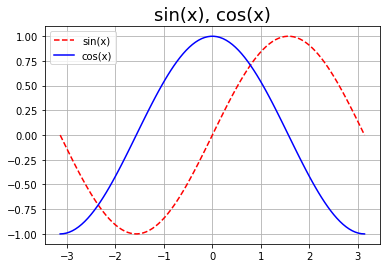

In [7]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.title("sin(x), cos(x)", fontsize=18)
plt.grid()
plt.plot(x, y1, "r--", label='sin(x)')
plt.plot(x, y2, "b", label='cos(x)')
plt.legend()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

Text(0.5, 0.98, 'Status of checking account')

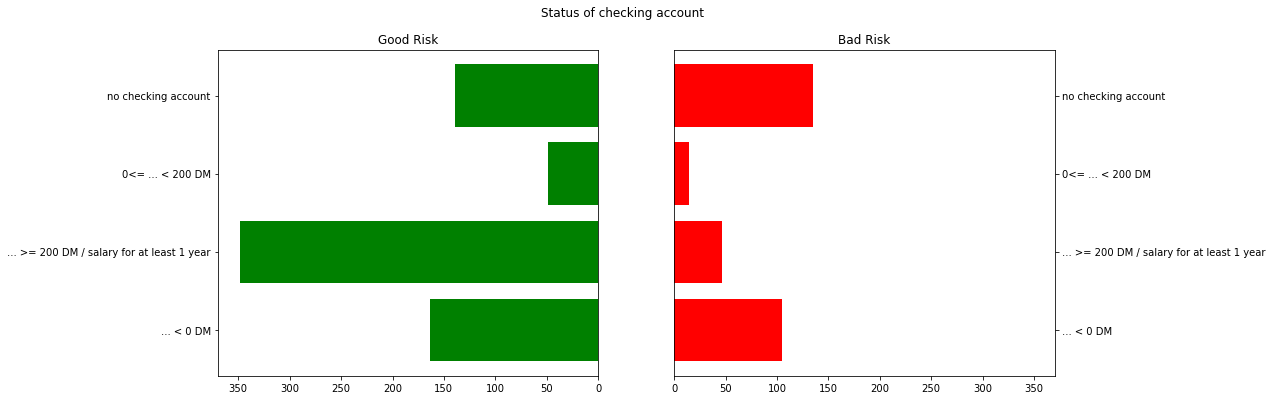

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
good_ones = data[data['credit_risk']=='good'].groupby('status', as_index=False).count()
bad_ones = data[data['credit_risk']=='bad'].groupby('status', as_index=False).count()
axs[0].barh(good_ones['status'], good_ones['amount'], color='g')
axs[0].set_xlim(370, 0)
axs[0].set_title('Good Risk')
axs[1].barh(bad_ones['status'], bad_ones['amount'], color='r')
axs[1].set_xlim(0, 370)
axs[1].yaxis.tick_right()
axs[1].set_title('Bad Risk')
fig.suptitle('Status of checking account')

### Задание 8  (0.5 балла)

In [9]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

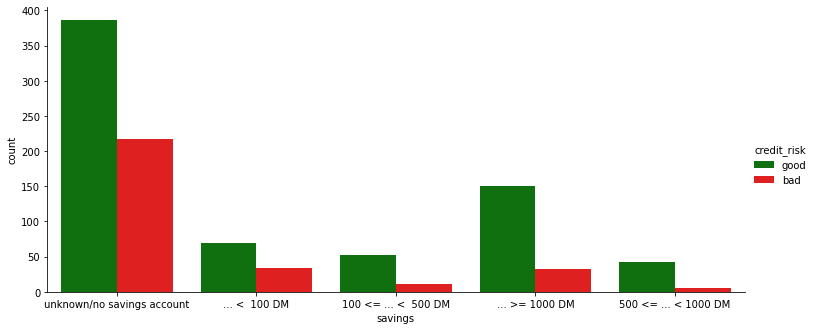

In [10]:
sns.catplot(x='savings', palette=['green', 'red'], hue='credit_risk', kind="count", data=data, height=4.5, aspect=2.3)

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

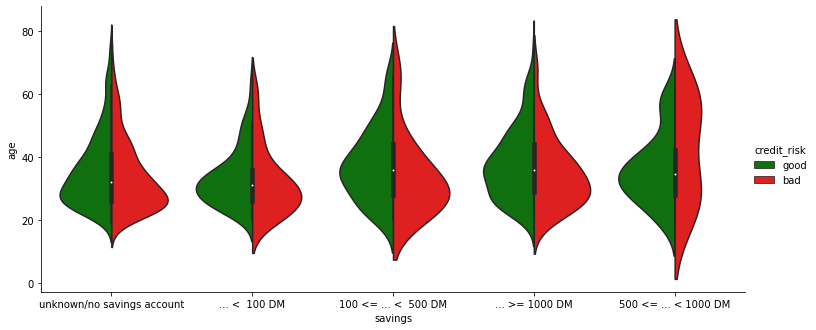

In [11]:
sns.catplot(x='savings', y='age', hue='credit_risk', palette=['green', 'red'], kind='violin', split=True, data=data, height=4.5, aspect=2.3)

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

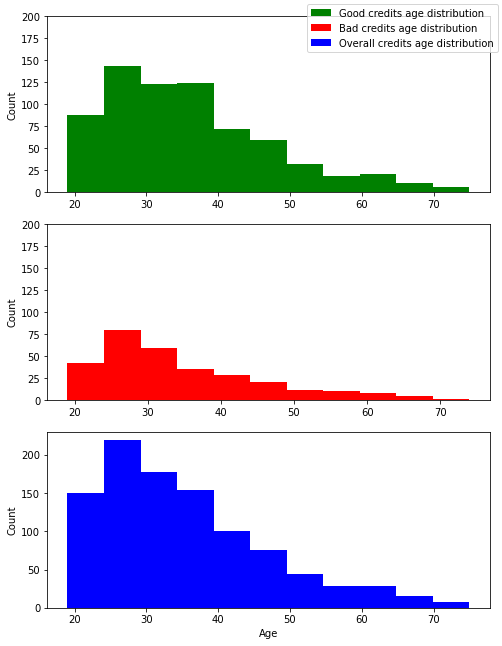

In [12]:
fig, axs = plt.subplots(3, 1, tight_layout=True, figsize=(7, 9))
axs[0].hist(data.loc[data['credit_risk']=='good']['age'].values.tolist(), bins=11, color='green', label='Good credits age distribution')
axs[1].hist(data.loc[data['credit_risk']=='bad']['age'].values.tolist(), bins=11, color='red', label='Bad credits age distribution')
axs[2].hist(data['age'].values.tolist(), bins=11, color='blue', label='Overall credits age distribution')
axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')
axs[2].set_ylabel('Count')
axs[2].set_xlabel('Age')
axs[0].set_ylim(0, 200)
axs[1].set_ylim(0, 200)
fig.legend()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

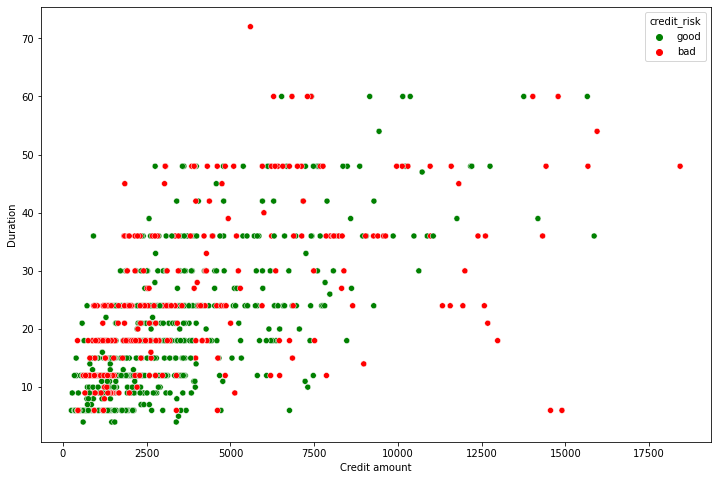

In [13]:
fig, axs = plt.subplots(figsize = (12, 8))
sns.scatterplot(x='amount', y='duration', hue='credit_risk', palette=['green', 'red'], data=data, ax=axs)
plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

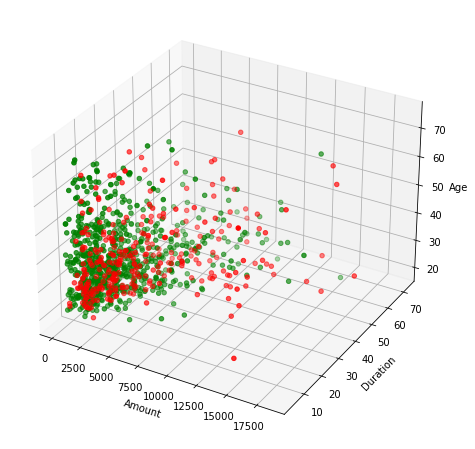

'соглашусь, можно было сделать и через data=data, но как по мне, то в данном случае понятнее, что откуда выходит'

In [14]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(data[data['credit_risk']=='good']['amount'], data[data['credit_risk']=='good']['duration'].values.tolist(), data[data['credit_risk']=='good']['age'].values.tolist(), c='g', marker='o')
ax.set_xlabel('Amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
ax.scatter(data[data['credit_risk']=='bad']['amount'], data[data['credit_risk']=='bad']['duration'].values.tolist(), data[data['credit_risk']=='bad']['age'].values.tolist(), c='r', marker='o')

plt.show()
'''соглашусь, можно было сделать и через data=data, но как по мне, то в данном случае понятнее, что откуда выходит'''

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [15]:
from sklearn.preprocessing import LabelEncoder
# Кодируем бинарные признаки
y = ['credit_risk', 'foreign_worker', 'telephone', 'people_liable']
le = LabelEncoder()
for i in y:
    le.fit(data[i])
    data[i] = le.transform(data[i])

# Кодируем порядковые признаки словарями 
status = {'no checking account': 0, '... < 0 DM': 1, '0<= ... < 200 DM': 2, '... >= 200 DM / salary for at least 1 year': 3}
credit_history = {'critical account/other credits elsewhere': 0, 'delay in paying off in the past': 1, 'existing credits paid back duly till now': 2, 'no credits taken/all credits paid back duly': 3, 'all credits at this bank paid back duly': 4}
savings = {'unknown/no savings account': 0, '... <  100 DM': 1, '100 <= ... <  500 DM': 2, '500 <= ... < 1000 DM': 3, '... >= 1000 DM': 4}
employment_duration = {'unemployed': 0, '< 1 yr': 1, '1 <= ... < 4 yrs': 2, '4 <= ... < 7 yrs': 3, '>= 7 yrs': 4}
installment_rate = {'< 20': 0, '20 <= ... < 25': 1, '25 <= ... < 35': 2, '>= 35': 3}
other_debtors = {'none': 0, 'guarantor': 1, 'co-applicant': 2}
present_residence = {'< 1 yr': 0, '1 <= ... < 4 yrs': 1, '4 <= ... < 7 yrs': 2, '>= 7 yrs': 3}
housing = {'for free': 0, 'rent': 1, 'own': 2}
number_credits = {'>= 6': 0, '4-5': 1, '2-3': 2, '1': 3}
# Теперь у нас будет два списка с именами колонок и названиями списков
# Я пытался сделать понятнее и проще, хотя бы без счетчика, но раз уж до дедлайна всего ничего, то я забил и сделал так, вроде все понятно
z = ['status', 'credit_history', 'savings', 'employment_duration', 'installment_rate', 'other_debtors', 'present_residence', 'housing', 'number_credits']
s = [status, credit_history, savings, employment_duration, installment_rate, other_debtors, present_residence, housing, number_credits]
# А теперь собственно перебьем значения
counter = 0
for i in z:
    data[i] = data[i].replace(s[counter])
    counter += 1

# У нас еще остались категориальные признаки, которые тоже надо закодировать (оказывается)
x = ['purpose', 'personal_status_sex', 'property', 'other_installment_plans', 'job']    #Список с именами признаков
data = pd.get_dummies(data, prefix=x)
data

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,age,...,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,0,18,4,1049,0,1,0,0,3,21,...,1,0,0,0,1,0,0,1,0,0
1,0,9,4,2799,0,2,2,0,1,36,...,0,0,1,0,1,0,0,1,0,0
2,1,12,3,841,1,3,2,0,3,23,...,0,0,1,0,1,0,0,0,0,1
3,0,12,4,2122,0,2,1,0,1,39,...,0,0,1,0,1,0,0,0,0,1
4,0,12,4,2171,0,2,0,0,3,38,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,3,1987,0,2,2,0,3,21,...,0,0,1,0,1,0,0,0,0,1
996,0,24,3,2303,0,4,0,2,0,45,...,0,0,1,0,1,0,0,1,0,0
997,3,21,4,12680,4,4,0,0,3,30,...,0,1,0,0,1,0,1,0,0,0
998,1,12,3,6468,4,0,2,0,0,52,...,0,1,0,0,1,0,1,0,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [16]:
def predict(Xtest: np.array) -> np.array:
    Xtest = np.where(2*Xtest[:,2] + Xtest[:,0]+ Xtest[:,4]+Xtest[:,11]>=8, 1, 0)
    return Xtest

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))


0.7